In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f17_gradebook = pd.read_csv('C:/Users/noahh/Dropbox/p3reu/data/gradebooks/F17_CS112.csv')
f18_gradebook = pd.read_csv('C:/Users/noahh/Dropbox/p3reu/data/gradebooks/F18_CS112.csv')
combined_gradebook = pd.concat([f17_gradebook, f18_gradebook], sort=False, ignore_index=True)
grades = combined_gradebook
labels = combined_gradebook.columns.values.tolist()

In [3]:
grades.describe()
grades.head()

,Username,LEC,LAB,LETTER,RAW,HC,FF,T1,T2,T3,...,L6Q,L7E,L8Q,L9E,L10E,L11E,L12T,L13E,ZY,L5E5
0,2560,3,226.0,B,82.7,0,1,67.0,58.5,54.5,...,60.0,100,50,100,100,100,20,100,NaN,NaN
1,2076,3,212.0,C+,78.9,0,0,64.5,71.0,65.5,...,35.0,100,70,100,0,80,28,0,NaN,NaN
2,1754,3,219.0,A,94.3,0,0,82.5,69.5,86.0,...,50.0,100,90,100,48,60,100,100,NaN,NaN
3,144,3,213.0,A-,90.3,0,0,82.0,78.5,75.0,...,60.0,100,50,100,100,84,56,100,NaN,NaN
4,627,3,224.0,A-,91.8,0,0,76.5,65.0,80.5,...,40.0,100,55,80,100,100,0,100,NaN,NaN


In [4]:
raw_scores = grades['RAW']
letter_grades = grades['LETTER']

In [5]:
sorted_scores = sorted(list(raw_scores))
grade_counts = letter_grades.value_counts().sort_index()
grade_order = ['A+','A','A-','B+','B','B-','C+','C','C-','D','F'][::-1]
grade_counts = grade_counts.reindex(index = grade_order)

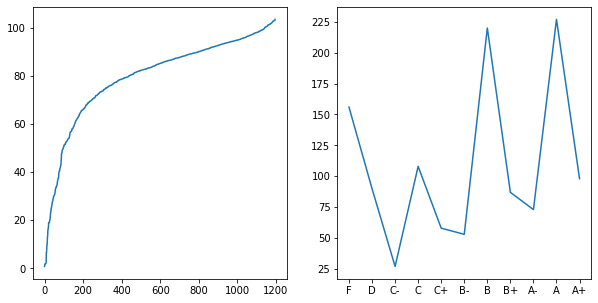

In [6]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.plot(sorted_scores)
ax2.plot(grade_counts)

In [7]:
num_failures = grade_counts[0]
total_count = sum(grade_counts)
percent_failures = (num_failures/total_count)*100
"{:.4}% failed".format(percent_failures)

'13.03% failed'

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [17]:
X = grades[['T1','T2']]
y = grades['T3']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [18]:
classifier = LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# classifier.predict(X_test)
scores = cross_val_score(classifier, X_test, y_test, cv=5)

In [23]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.62 (+/- 0.21)
